# **Importing libraries**

**installing pmdarima**

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.5 MB/s eta 0:00:00


In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pmdarima as pm
import time

# **Load and Display the Dataset**

In [26]:

# Load the dataset
data_path = '/content/time_series_covid19_confirmed_global.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


## **Data preprocessing**

In [28]:
# Aggregate data globally
global_data = data.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long']).sum().reset_index()

# Rename columns for clarity
global_data.columns = ['date', 'cases']

# Convert date column to datetime
global_data['date'] = pd.to_datetime(global_data['date'])

# Set the date column as the index
global_data.set_index('date', inplace=True)

<ipython-input-28-ac79e4dcea6b>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  global_data['date'] = pd.to_datetime(global_data['date'])


## **Feature Engineering**

In [29]:
# Prepare data for imputation and model training
data_combined = global_data[['cases']]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data_combined_imputed = pd.DataFrame(imputer.fit_transform(data_combined), columns=data_combined.columns)

# Create time series features
look_back = 7
X, y = [], []

for i in range(len(data_combined_imputed) - look_back):
    X.append(data_combined_imputed.iloc[i:i + look_back].values.flatten())
    y.append(data_combined_imputed.iloc[i + look_back].values)

X, y = np.array(X), np.array(y)

## **Split the data into training and testing sets**

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Model Evaluation**

In [42]:
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 455875423069.4287
R-squared: 0.9999919900171933


# **Perform Exploratory Data Analysis (EDA)**

In [ ]:
# Aggregate data globally
global_data = data.drop(['Country/Region', 'Lat', 'Long'], axis=1).sum(axis=0)

# Convert to time series
time_series = pd.Series(data=global_data.values, index=pd.to_datetime(global_data.index))

# Plot the time series
time_series.plot(figsize=(10, 5), title="Global COVID-19 Confirmed Cases")
plt.show()


NameError: name 'data' is not defined

# **Check for Stationarity and Difference the Data if Necessary**

ADF Statistic: 0.00811365175256826
p-value: 0.9591979579662502


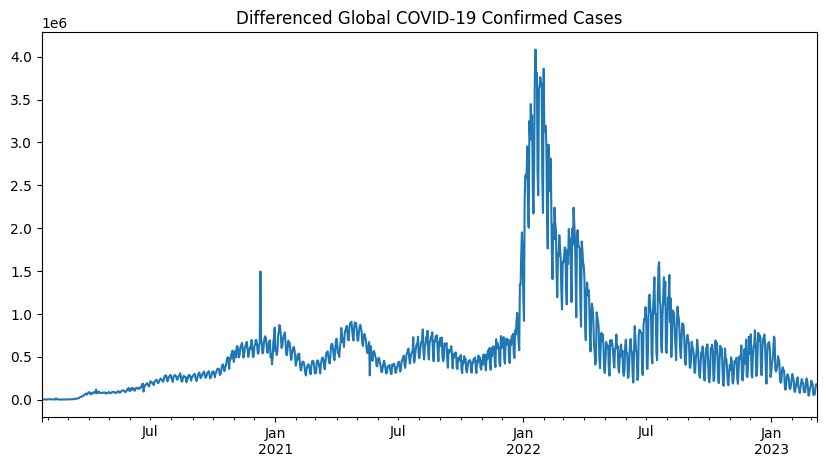

In [ ]:
# Perform ADF test
adf_result = adfuller(time_series)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

if adf_result[1] > 0.05:
    # Differencing the time series
    time_series_diff = time_series.diff().dropna()
else:
    time_series_diff = time_series

# Plot differenced time series if needed
if adf_result[1] > 0.05:
    time_series_diff.plot(figsize=(10, 5), title="Differenced Global COVID-19 Confirmed Cases")
    plt.show()


# **Data Augmentation**

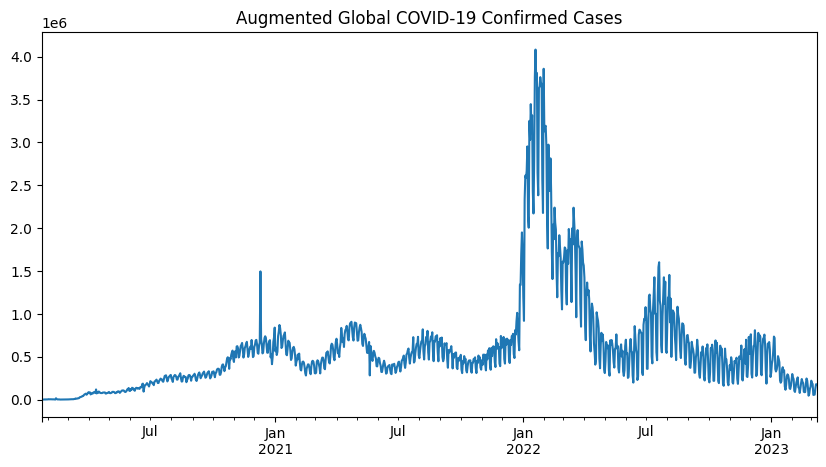

In [ ]:
# Generate synthetic data by adding random noise
np.random.seed(42)
noise = np.random.normal(0, 1, time_series_diff.shape)
time_series_augmented = time_series_diff + noise

# Plot the augmented data
time_series_augmented.plot(figsize=(10, 5), title=f"Augmented Global COVID-19 Confirmed Cases")
plt.show()

# **Identify the Optimal ARIMA Parameters**

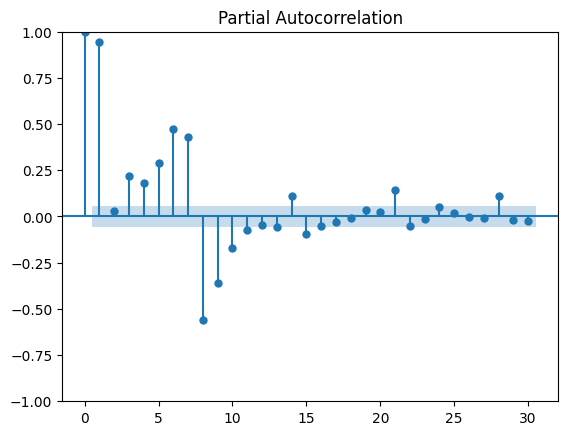

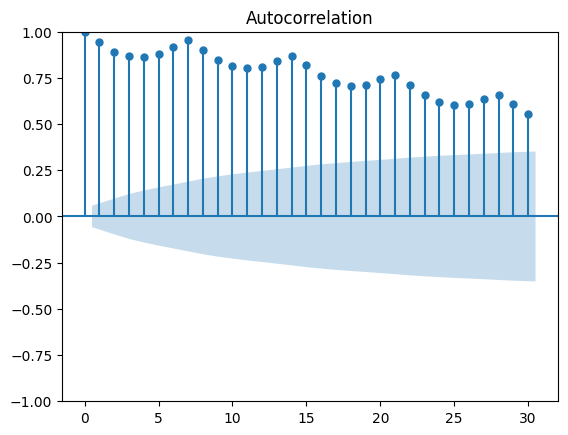

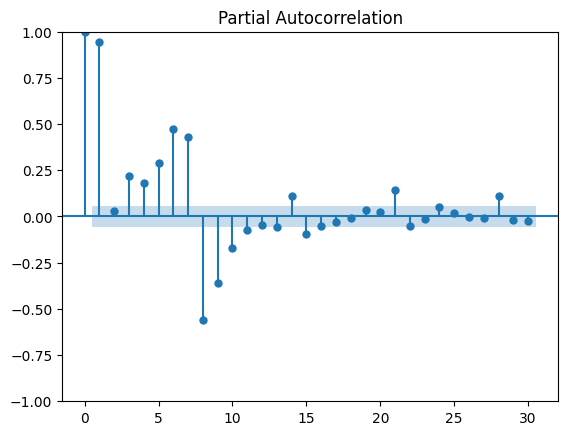

In [ ]:

# Plot ACF and PACF
plot_acf(time_series_diff, lags=30)
plot_pacf(time_series_diff, lags=30)


# **Model Optimization**

In [ ]:
# Start timing the grid search
start_time = time.time()

# Fit auto_arima
auto_model = pm.auto_arima(time_series, seasonal=True, m=12, trace=True,
                           error_action='ignore', suppress_warnings=True, stepwise=True)

end_time = time.time()

print(f'Best ARIMA parameters: {auto_model.order} Seasonal ARIMA parameters: {auto_model.seasonal_order}')
print(f'Time taken for model selection: {end_time - start_time} seconds')


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=inf, Time=8.31 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=31102.440, Time=0.05 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=31044.042, Time=0.40 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=30978.592, Time=0.63 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=31095.665, Time=0.12 sec
 ARIMA(0,2,1)(1,0,1)[12]             : AIC=30953.510, Time=1.26 sec
 ARIMA(0,2,1)(1,0,0)[12]             : AIC=31037.883, Time=0.76 sec
 ARIMA(0,2,1)(2,0,1)[12]             : AIC=30872.160, Time=3.61 sec
 ARIMA(0,2,1)(2,0,0)[12]             : AIC=30870.619, Time=1.58 sec
 ARIMA(0,2,0)(2,0,0)[12]             : AIC=31009.325, Time=0.80 sec
 ARIMA(1,2,1)(2,0,0)[12]             : AIC=30842.458, Time=4.33 sec
 ARIMA(1,2,1)(1,0,0)[12]             : AIC=30920.358, Time=1.40 sec
 ARIMA(1,2,1)(2,0,1)[12]             : AIC=30844.276, Time=7.87 sec
 ARIMA(1,2,1)(1,0,1)[12]             : AIC=30862.739, Time=1.81 sec
 ARIMA(1,2,

## **Fit the ARIMA Model with Optimized Parameters**

In [ ]:
# Fit the ARIMA model with the best parameters from auto_arima
fitted_model = ARIMA(time_series, order=auto_model.order, seasonal_order=auto_model.seasonal_order).fit()

# Print summary of the model
print(fitted_model.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                       
Dep. Variable:                                     y   No. Observations:                 1143
Model:             ARIMA(5, 2, 5)x(2, 0, [1, 2], 12)   Log Likelihood              -14952.418
Date:                               Sat, 25 May 2024   AIC                          29934.837
Time:                                       10:51:14   BIC                          30010.432
Sample:                                   01-22-2020   HQIC                         29963.383
                                        - 03-09-2023                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3205      0.070      4.611      0.000       0.184       0.457
ar.L2      

# **Forecast Future Values**

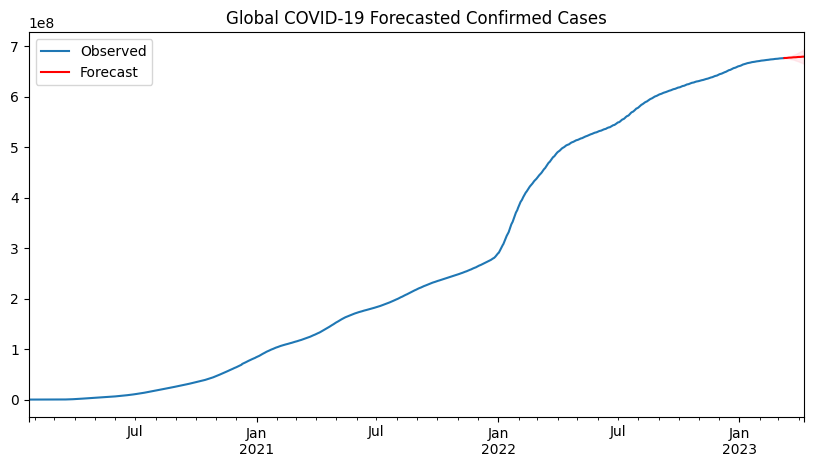

In [ ]:
# Forecast the next 30 days
forecast_steps = 30
forecast = fitted_model.forecast(steps=forecast_steps)
forecast_ci = fitted_model.get_forecast(steps=forecast_steps).conf_int()

# Plot the forecast
time_series.plot(label='Observed', figsize=(10, 5))
forecast.plot(label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title("Global COVID-19 Forecasted Confirmed Cases")
plt.legend()
plt.show()
